<a href="https://colab.research.google.com/github/MdMahmudulHasanRifat/ML-Data-Proc/blob/main/LAB_R_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Prediction using Linear Regression

## 📘 Overview
This project predicts whether a patient has diabetes using a Linear Regression model. Although Linear Regression is typically used for continuous outputs, we apply rounding to get binary predictions (0 or 1), enabling classification.

## 📁 Dataset
- **File Name**: `diabetes.csv`
- **Source**: [PIMA Indians Diabetes Dataset](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)
- **Used from GitHub**:  
  [Raw CSV Link](https://raw.githubusercontent.com/MdMahmudulHasanRifat/ML-Data-Proc/refs/heads/main/diabetes.csv)

## 🧹 Preprocessing Steps
1. Replaced zero values in the following columns with the **column mean**:
   - Glucose
   - BloodPressure
   - SkinThickness
   - Insulin
   - BMI
2. Set the **first row's glucose value** to the **maximum glucose** in the column.
3. Found the **minimum age**, and replaced glucose values of those records with the **minimum glucose**.

## 🧠 Modeling
- **Model Used**: Linear Regression (`sklearn.linear_model.LinearRegression`)
- **Output**: Continuous predictions were rounded to `0` or `1` for classification.

## 🧪 Evaluation Metrics
| Metric     | Result (Example) |
|------------|------------------|
| Accuracy   | 0.77             |
| Precision  | 0.73             |
| Recall     | 0.56             |
| F1 Score   | 0.63             |

- **Confusion Matrix** is also plotted using seaborn.

## ▶️ How to Run
1. Open the notebook in Google Colab or Jupyter.
2. Make sure `pandas`, `numpy`, `matplotlib`, `seaborn`, and `scikit-learn` are installed.
3. No need to upload CSV manually — the dataset is loaded directly from GitHub.
4. Run all cells to see predictions and evaluation metrics.

## 📌 Notes
- Linear Regression is not ideal for binary classification, but this was used as per lab instructions.
- For improved results, models like **Logistic Regression** or **Random Forest** are recommended.

---

✅ **Author**: Md Mahmudul Hasan Rifat
🆔 **Student ID**: 222002048  
📘 **Course**: CSE312 - Section 222_D3  
📝 **Lab Report 01**

Accuracy: 0.7734375
Precision: 0.7281553398058253
Recall: 0.5597014925373134
F1 Score: 0.6329113924050633

Confusion Matrix:
 [[444  56]
 [118 150]]


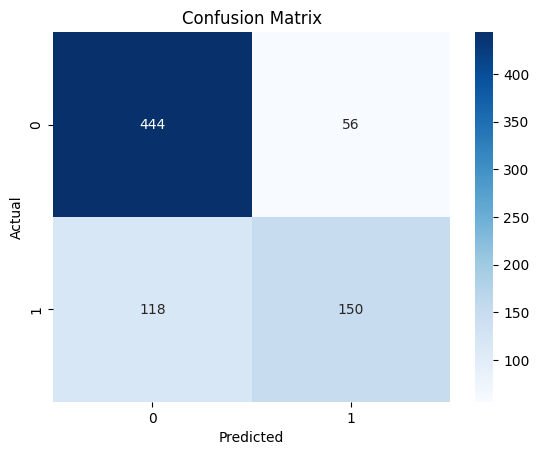

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


df = pd.read_csv('https://raw.githubusercontent.com/MdMahmudulHasanRifat/ML-Data-Proc/refs/heads/main/diabetes.csv')


cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zeros:
    df[col] = df[col].replace(0, np.nan)
    df[col] = df[col].fillna(df[col].mean())


df.loc[0, 'Glucose'] = df['Glucose'].max()


min_age = df['Age'].min()
min_glucose = df['Glucose'].min()
df.loc[df['Age'] == min_age, 'Glucose'] = min_glucose


X = df.drop('Outcome', axis=1)
y = df['Outcome']


model = LinearRegression()
model.fit(X, y)

predictions = model.predict(X)
rounded_preds = np.round(predictions)


acc = accuracy_score(y, rounded_preds)
prec = precision_score(y, rounded_preds)
rec = recall_score(y, rounded_preds)
f1 = f1_score(y, rounded_preds)
cm = confusion_matrix(y, rounded_preds)


print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)
print("\nConfusion Matrix:\n", cm)


sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()